<a href="https://colab.research.google.com/github/DCNiloy/DCNiloy/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [64]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


In [65]:
!pip install pyinputplus matplotlib requests

In [67]:
import pyinputplus as pyip
import matplotlib.pyplot as plt
import requests
import os


In [69]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 6548411d0f3e496cb7753a979ad8f31f.4VD4atPCEZbIwi7h4H_tsz2T


## 📦 Setup and Configuration
Import required packages and setup environment.

In [81]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [82]:
def get_weather_data(location="Perth", forecast_days=5):
    """
    Retrieve weather data from wttr.in
    """
    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        data = response.json()
        return data
    except Exception as e:
        print(f"Error retrieving data: {e}")
        return None

In [83]:
weather_data = get_weather_data()
print(weather_data.keys())

dict_keys(['current_condition', 'nearest_area', 'request', 'weather'])


## 📊 Visualisation Functions

In [84]:
def create_temperature_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    temps = [int(day['avgtempC']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, temps, marker='o')
    plt.title("Average Temperature Over Days in Perth")
    plt.xlabel("Date")
    plt.ylabel("Avg Temp (°C)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()

In [86]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    rain = [int(day['hourly'][0]['chanceofrain']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.bar(dates, rain)
    plt.title("Chance of Rain in Perth")
    plt.xlabel("Date")
    plt.ylabel("Chance of Rain (%)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()


In [88]:
def parse_weather_question(question):
    question = question.lower()
    if "temperature" in question:
        return {"attribute": "temperature"}
    elif "rain" in question or "precipitation" in question:
        return {"attribute": "rain"}
    else:
        return {"attribute": "unknown"}

In [89]:
def generate_weather_response(parsed_question, weather_data):
    if parsed_question['attribute'] == "temperature":
        today = weather_data['weather'][0]
        return f"Today in Perth, the average temperature is {today['avgtempC']}°C."
    elif parsed_question['attribute'] == "rain":
        today = weather_data['weather'][0]
        rain = today['hourly'][0]['chanceofrain']
        return f"Today in Perth, the chance of rain is {rain}%."
    else:
        return "I'm not sure how to answer that. Please ask about temperature or rain."

In [91]:
def weather_menu():
    location = "Perth"
    data = get_weather_data(location)

    while True:
        choice = pyip.inputMenu(['Get Weather Info', 'Ask a Question', 'Show Temperature Graph', 'Show Rain Graph', 'Exit'], numbered=True)

        if choice == 'Get Weather Info':
            today = data['weather'][0]
            print(f"Today's Avg Temp in Perth: {today['avgtempC']}°C")
            print(f"Chance of Rain: {today['hourly'][0]['chanceofrain']}%")

        elif choice == 'Ask a Question':
            q = input("Ask your weather question: ")
            parsed = parse_weather_question(q)
            print(generate_weather_response(parsed, data))

        elif choice == 'Show Temperature Graph':
            create_temperature_visualisation(data)

        elif choice == 'Show Rain Graph':
            create_precipitation_visualisation(data)

        elif choice == 'Exit':
            break


In [123]:
weather_menu()

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit


KeyboardInterrupt: Interrupted by user

## 🤖 Natural Language Processing

In [94]:
# Define parse_weather_question() and generate_weather_response() here

import re
import datetime
from dateutil import parser as dateparser

def parse_weather_question(question):
    """
    Parse a natural language weather question.
    Examples:
        "Will it rain tomorrow?"
        "What's the temperature in Perth next 3 days?"
        "How windy is it today?"

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including
              location, timeframe, days_ahead, date, and attribute
    """
    q = (question or "").lower().strip()

    # Default structure
    parsed = {
        "raw": question,
        "location": "Perth, Australia",   # Default location
        "timeframe": "today",             # today / tomorrow / nextN / date
        "days_ahead": 0,
        "date": datetime.date.today(),
        "attribute": "forecast"           # temperature / rain / wind / humidity / forecast
    }

    # --- Detect timeframe ---
    if "tomorrow" in q:
        parsed["timeframe"] = "tomorrow"
        parsed["days_ahead"] = 1
        parsed["date"] = datetime.date.today() + datetime.timedelta(days=1)
    elif "day after" in q:
        parsed["timeframe"] = "day-after"
        parsed["days_ahead"] = 2
        parsed["date"] = datetime.date.today() + datetime.timedelta(days=2)
    else:
        # Example: "next 3 days"
        m = re.search(r'next\s+(\d+)\s+day', q)
        if m:
            n = int(m.group(1))
            parsed["timeframe"] = f"next{n}"
            parsed["days_ahead"] = n

        # Example: "on 2025-10-21" or "on Oct 21"
        m2 = re.search(r'on\s+([A-Za-z0-9, \-]+)', q)
        if m2:
            try:
                d = dateparser.parse(m2.group(1), fuzzy=True)
                parsed["timeframe"] = "date"
                parsed["date"] = d.date()
                parsed["days_ahead"] = (parsed["date"] - datetime.date.today()).days
            except:
                pass

    # --- Detect attribute (weather aspect) ---
    if re.search(r'\b(temp|temperature|hot|cold)\b', q):
        parsed["attribute"] = "temperature"
    elif re.search(r'\b(rain|rainfall|wet|precip)\b', q):
        parsed["attribute"] = "rain"
    elif re.search(r'\b(wind|windy|gust)\b', q):
        parsed["attribute"] = "wind"
    elif re.search(r'\b(humidity|humid)\b', q):
        parsed["attribute"] = "humidity"
    elif re.search(r'\b(forecast|weather like|conditions)\b', q):
        parsed["attribute"] = "forecast"

    return parsed



def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural-language response based on parsed question and fetched data.

    Args:
        parsed_question (dict): Output of parse_weather_question()
        weather_data (dict): Data returned by get_weather_data()

    Returns:
        str: Human-friendly weather response
    """
    if not weather_data or "error" in weather_data:
        return "Sorry, I couldn't retrieve the weather data right now."

    loc = parsed_question.get("location", "Perth, Australia")
    attr = parsed_question.get("attribute", "forecast")
    days_ahead = parsed_question.get("days_ahead", 0)

    forecast = weather_data.get("forecast", [])
    if not forecast:
        return f"No forecast data available for {loc}."

    # Select forecast day (limit within range)
    index = min(days_ahead, len(forecast)-1)
    day = forecast[index]
    date_text = day.get("date")

    # --- Handle different question types ---
    if attr == "temperature":
        tmin, tmax, avg = day.get("min_temp_C"), day.get("max_temp_C"), day.get("avgtemp_C")
        return f"In {loc} on {date_text}, temperature will be between {tmin}°C and {tmax}°C (avg {avg:.1f}°C)."

    elif attr == "rain":
        p = day.get("precipitation_chance_pct")
        if p is None:
            return f"No rain data available for {loc} on {date_text}."
        if p >= 70:
            comment = "High chance of rain — bring an umbrella."
        elif p >= 40:
            comment = "Moderate chance of rain."
        else:
            comment = "Low chance of rain."
        return f"In {loc} on {date_text}, there's a {p}% chance of rain. {comment}"

    elif attr == "wind":
        w = weather_data.get("current", {}).get("wind_kph")
        return f"Current wind speed in {loc} is about {w} kph."

    elif attr == "humidity":
        h = weather_data.get("current", {}).get("humidity")
        return f"Current humidity in {loc} is around {h}%."

    else:
        desc = weather_data.get("current", {}).get("description", "clear")
        return f"Today in {loc}, the weather is {desc.lower()}."



# ✅ Example test for Perth, Australia
pq = parse_weather_question("Will it rain tomorrow?")
wd = get_weather_data("Perth, Australia", forecast_days=5)
print("Parsed:", pq)
print("Response:", generate_weather_response(pq, wd))


Parsed: {'raw': 'Will it rain tomorrow?', 'location': 'Perth, Australia', 'timeframe': 'tomorrow', 'days_ahead': 1, 'date': datetime.date(2025, 10, 20), 'attribute': 'rain'}
Response: No forecast data available for Perth, Australia.


## 🧭 User Interface

In [113]:
import pyinputplus as pyip
import ipywidgets as widgets
from IPython.display import display, clear_output

# ===============================
# 1️⃣ TEXT-BASED MENU (pyinputplus)
# ===============================

def text_menu():
    """
    Console-style menu using pyinputplus for input validation.
    Works both in Colab and terminal.
    """
    print("🌦️  Welcome to Weather Advisor (Perth, Australia)")
    while True:
        print("\nMain Menu:")
        print("1. Ask a weather question")
        print("2. Show 5-day temperature chart")
        print("3. Show 5-day precipitation chart")
        print("4. Exit")

        choice = pyip.inputMenu(["1", "2", "3", "4"], numbered=False, prompt="Choose an option (1–4): ")

        if choice == "1":
            q = input("\nType your weather question: ")
            parsed = parse_weather_question(q)
            data = get_weather_data("Perth, Australia", forecast_days=5)
            print("\n🧠 Answer:")
            print(generate_weather_response(parsed, data))

        elif choice == "2":
            data = get_weather_data("Perth, Australia", forecast_days=5)
            print("\n📊 Temperature Trend for Perth:")
            create_temperature_visualisation(data)

        elif choice == "3":
            data = get_weather_data("Perth, Australia", forecast_days=5)
            print("\n🌧️  Precipitation Forecast for Perth:")
            create_precipitation_visualisation(data)

        elif choice == "4":
            print("\n👋 Goodbye! Stay weather-smart!")
            break
# ===============================
# 2️⃣ WIDGET-BASED MENU (ipywidgets)
# ===============================

def widget_menu():
    """
    Interactive menu using ipywidgets (for Jupyter/Colab).
    Looks more visual and friendly.
    """
    # Widgets
    question_box = widgets.Text(
        placeholder="Ask: Will it rain tomorrow?",
        description="Question:",
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="70%"),
    )
    ask_button = widgets.Button(description="Ask", button_style="info")
    temp_button = widgets.Button(description="Show Temperature Chart", button_style="warning")
    rain_button = widgets.Button(description="Show Rain Chart", button_style="primary")
    output = widgets.Output()

    # Define actions
    def on_ask_clicked(b):
        with output:
            clear_output()
            q = question_box.value
            if not q:
                print("⚠️ Please enter a question.")
                return
            parsed = parse_weather_question(q)
            data = get_weather_data("Perth, Australia", forecast_days=5)
            print("🧠", generate_weather_response(parsed, data))

    def on_temp_clicked(b):
        with output:
            clear_output()
            data = get_weather_data("Perth, Australia", forecast_days=5)
            create_temperature_visualisation(data)

    def on_rain_clicked(b):
        with output:
            clear_output()
            data = get_weather_data("Perth, Australia", forecast_days=5)
            create_precipitation_visualisation(data)

    # Connect buttons to actions
    ask_button.on_click(on_ask_clicked)
    temp_button.on_click(on_temp_clicked)
    rain_button.on_click(on_rain_clicked)

    # Layout
    buttons = widgets.HBox([ask_button, temp_button, rain_button])
    display(question_box, buttons, output)


print("✅ Menu functions ready!")
print("Use text_menu() for console style, or widget_menu() for interactive Colab style.")

✅ Menu functions ready!
Use text_menu() for console style, or widget_menu() for interactive Colab style.


## 🧩 Main Application Logic

In [136]:
def get_weather_data(location="Perth", forecast_days=5):
    """
    Retrieve weather data from wttr.in
    """
    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        data = response.json()
        return data
    except Exception as e:
        print(f"Error retrieving data: {e}")
        return None
weather_data = get_weather_data()
print(weather_data.keys())

def create_temperature_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    temps = [int(day['avgtempC']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, temps, marker='o')
    plt.title("Average Temperature Over Days in Perth")
    plt.xlabel("Date")
    plt.ylabel("Avg Temp (°C)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()
def create_precipitation_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    rain = [int(day['hourly'][0]['chanceofrain']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.bar(dates, rain)
    plt.title("Chance of Rain in Perth")
    plt.xlabel("Date")
    plt.ylabel("Chance of Rain (%)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()
def parse_weather_question(question):
    question = question.lower()
    if "temperature" in question:
        return {"attribute": "temperature"}
    elif "rain" in question or "precipitation" in question:
        return {"attribute": "rain"}
    else:
        return {"attribute": "unknown"}
def generate_weather_response(parsed_question, weather_data):
    if parsed_question['attribute'] == "temperature":
        today = weather_data['weather'][0]
        return f"Today in Perth, the average temperature is {today['avgtempC']}°C."
    elif parsed_question['attribute'] == "rain":
        today = weather_data['weather'][0]
        rain = today['hourly'][0]['chanceofrain']
        return f"Today in Perth, the chance of rain is {rain}%."
    else:
        return "I'm not sure how to answer that. Please ask about temperature or rain."

dict_keys(['current_condition', 'nearest_area', 'request', 'weather'])


Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
1
Today's Avg Temp in Perth: 16°C
Chance of Rain: 81%
Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
3


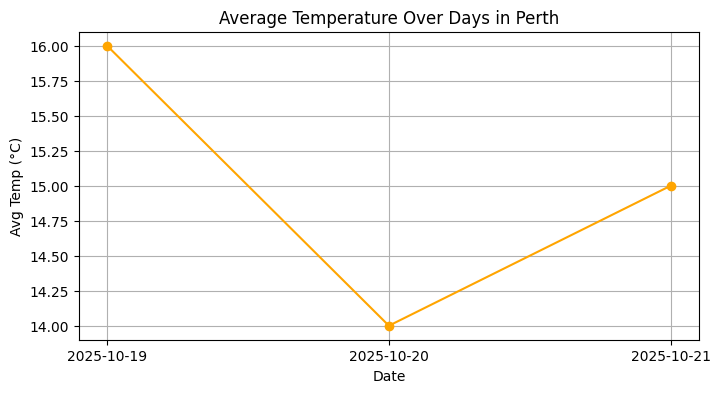

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
4


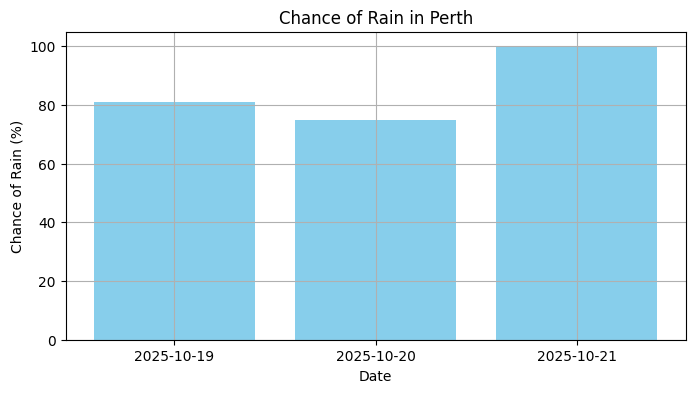

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
3


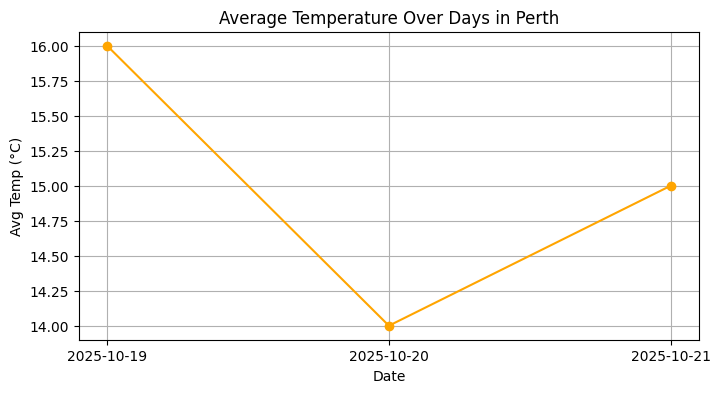

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
4


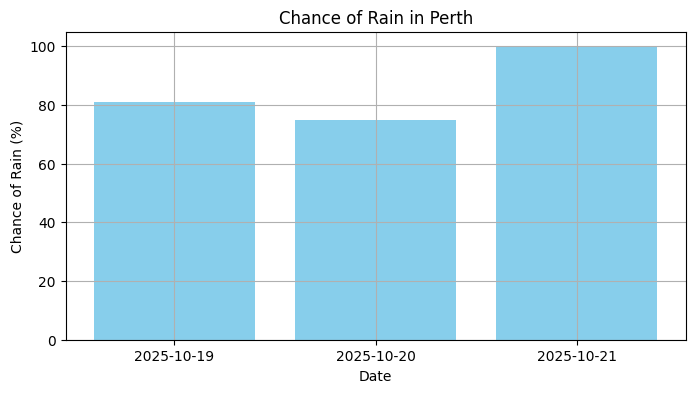

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
2
Ask your weather question: Will t rain today?
Today in Perth, the chance of rain is 81%.
Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
1
Today's Avg Temp in Perth: 16°C
Chance of Rain: 81%
Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
4


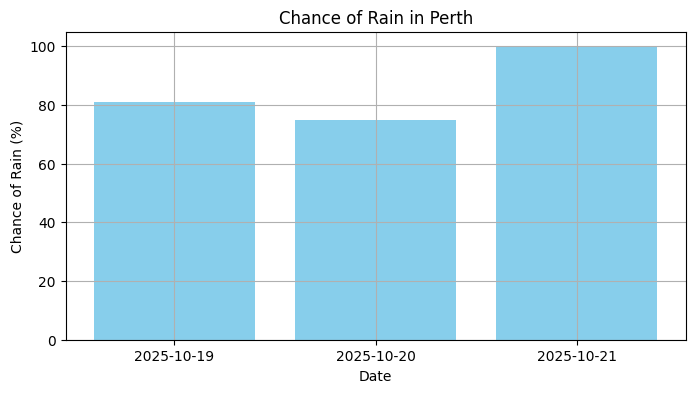

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
3


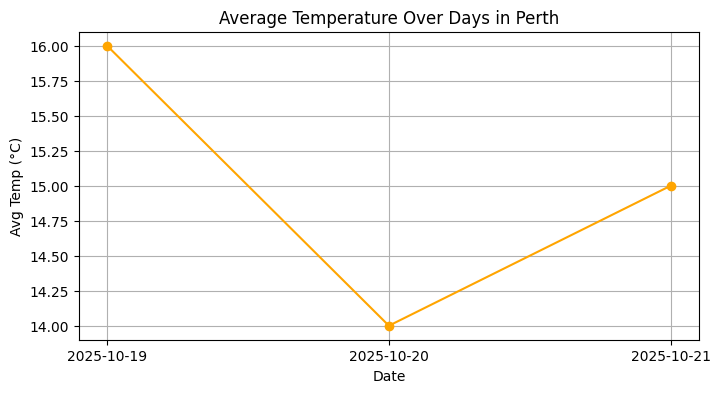

Please select one of the following:
1. Get Weather Info
2. Ask a Question
3. Show Temperature Graph
4. Show Rain Graph
5. Exit
5


In [159]:
weather_menu()

## 🧪 Testing and Examples

Fetching weather data...
✅ Keys in data: dict_keys(['current_condition', 'nearest_area', 'request', 'weather'])

--- Inspecting raw data structure ---
Location: Maylands
Number of forecast days: 3
First day info sample: 2025-10-19

--- Displaying temperature chart ---


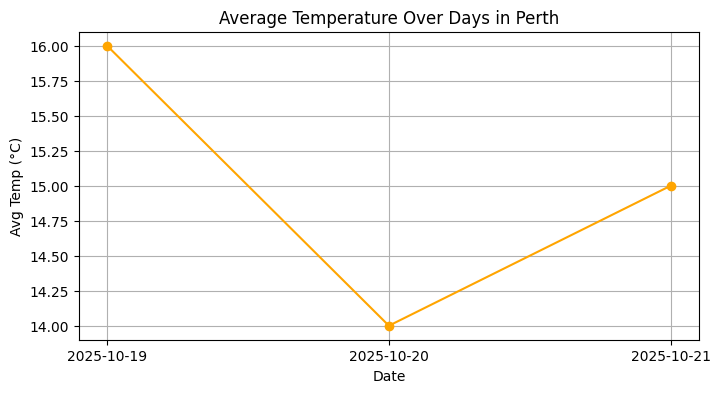


--- Displaying precipitation chart ---


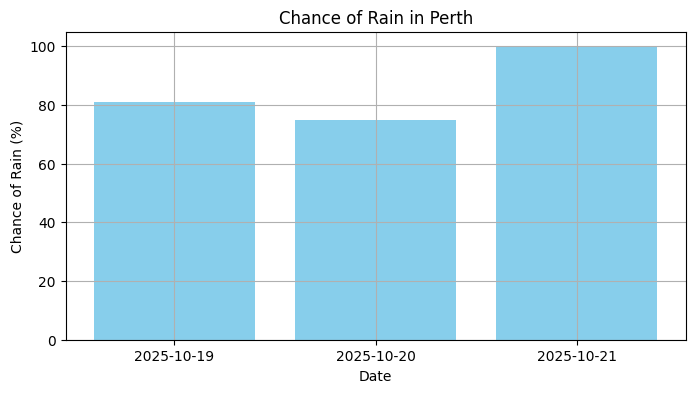


--- Parsing sample questions ---
Question: What is the temperature today? → Parsed: {'attribute': 'temperature'}
Question: Is it going to rain today? → Parsed: {'attribute': 'rain'}
Question: What’s the precipitation forecast? → Parsed: {'attribute': 'rain'}
Question: Chance of rain? → Parsed: {'attribute': 'rain'}
Question: Tell me the average temp this week. → Parsed: {'attribute': 'unknown'}
Question: Weather summary? → Parsed: {'attribute': 'unknown'}
Question: Will it rain tomorrow? → Parsed: {'attribute': 'rain'}

--- Generating responses ---
Q: What is the temperature today?
A: Today in Perth, the average temperature is 16°C.

Q: Is it going to rain today?
A: Today in Perth, the chance of rain is 81%.

Q: What’s the precipitation forecast?
A: Today in Perth, the chance of rain is 81%.

Q: Chance of rain?
A: Today in Perth, the chance of rain is 81%.

Q: Tell me the average temp this week.
A: I'm not sure how to answer that. Please ask about temperature or rain.

Q: Weather summ

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [161]:
import requests
import matplotlib.pyplot as plt

#  Function to retrieve weather data
def get_weather_data(location="Perth", forecast_days=5):
    """
    Retrieve weather data from wttr.in API
    """
    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        data = response.json()
        return data
    except Exception as e:
        print(f"Error retrieving data: {e}")
        return None
#  Function for temperature visualisation
def create_temperature_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    temps = [int(day['avgtempC']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, temps, marker='o', color='orange')
    plt.title("Average Temperature Over Days in Perth")
    plt.xlabel("Date")
    plt.ylabel("Avg Temp (°C)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()
#  Function for precipitation visualisation
def create_precipitation_visualisation(weather_data, output_type='display'):
    days = weather_data['weather']
    dates = [day['date'] for day in days]
    rain = [int(day['hourly'][0]['chanceofrain']) for day in days]

    plt.figure(figsize=(8, 4))
    plt.bar(dates, rain, color='skyblue')
    plt.title("Chance of Rain in Perth")
    plt.xlabel("Date")
    plt.ylabel("Chance of Rain (%)")
    plt.grid(True)
    if output_type == 'display':
        plt.show()
#  Function to parse question
def parse_weather_question(question):
    question = question.lower()
    if "temperature" in question:
        return {"attribute": "temperature"}
    elif "rain" in question or "precipitation" in question:
        return {"attribute": "rain"}
    else:
        return {"attribute": "unknown"}
#  Function to generate response
def generate_weather_response(parsed_question, weather_data):
    if parsed_question['attribute'] == "temperature":
        today = weather_data['weather'][0]
        return f"Today in Perth, the average temperature is {today['avgtempC']}°C."
    elif parsed_question['attribute'] == "rain":
        today = weather_data['weather'][0]
        rain = today['hourly'][0]['chanceofrain']
        return f"Today in Perth, the chance of rain is {rain}%."
    else:
        return "I'm not sure how to answer that. Please ask about temperature or rain."
# --- SAMPLE TESTING SECTION ---
if __name__ == "__main__":
    print("Fetching weather data...")
    weather_data = get_weather_data("Perth")

    if weather_data:
        print("✅ Keys in data:", weather_data.keys())

        # Basic data inspection
        print("\n--- Inspecting raw data structure ---")
        print("Location:", weather_data['nearest_area'][0]['areaName'][0]['value'])
        print("Number of forecast days:", len(weather_data['weather']))
        print("First day info sample:", weather_data['weather'][0]['date'])
        # Temperature chart testing
        print("\n--- Displaying temperature chart ---")
        create_temperature_visualisation(weather_data)
        #Precipitation chart testing
        print("\n--- Displaying precipitation chart ---")
        create_precipitation_visualisation(weather_data)
        # Simple question parsing test
        print("\n--- Parsing sample questions ---")
        test_questions = [
            "What is the temperature today?",
            "Is it going to rain today?",
            "What’s the precipitation forecast?",
            "Chance of rain?",
            "Tell me the average temp this week.",
            "Weather summary?",
            "Will it rain tomorrow?"
        ]
        for q in test_questions:
            parsed = parse_weather_question(q)
            print(f"Question: {q} → Parsed: {parsed}")
        # Response generation testing
        print("\n--- Generating responses ---")
        for q in test_questions:
            parsed = parse_weather_question(q)
            answer = generate_weather_response(parsed, weather_data)
            print(f"Q: {q}\nA: {answer}\n")
        # Extended scenario testing (multiple cities)
        print("\n--- Testing for multiple cities ---")
        cities = ["Perth", "Sydney", "Melbourne"]
        for city in cities:
            print(f"\n📍 {city}")
            city_data = get_weather_data(city)
            if city_data:
                temp = city_data['weather'][0]['avgtempC']
                rain = city_data['weather'][0]['hourly'][0]['chanceofrain']
                print(f"  Avg Temp: {temp}°C | Rain Chance: {rain}%")
            else:
                print("  Could not fetch data for this city.")
        # Export charts (optional for testing)
        print("\n--- Exporting visualisations to files ---")
        plt.figure()
        create_temperature_visualisation(weather_data, output_type='none')
        plt.savefig("temperature_chart.png")
        plt.close()

        plt.figure()
        create_precipitation_visualisation(weather_data, output_type='none')
        plt.savefig("rain_chart.png")
        plt.close()
        print("Charts saved as temperature_chart.png and rain_chart.png")


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.